In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image

# ---------- 1) Load an image ----------

import matplotlib.image as mpimg
img = mpimg.imread("charmainder.png")
if img.dtype == np.uint8:
    img = img / 255.0  # scale to [0, 1] floats

H, W, C = img.shape  # height, width , channels

# ---------- 2) Prepare data for K-Means ----------
X = img.reshape(-1, 3)  # (H*W, 3) = one row per pixel, columns are R,G,B


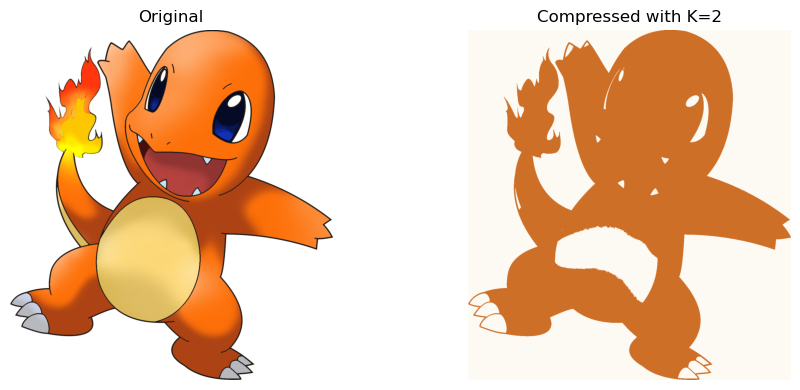

./output-images/compressed-charmainder k= 2.png SAVED successfully


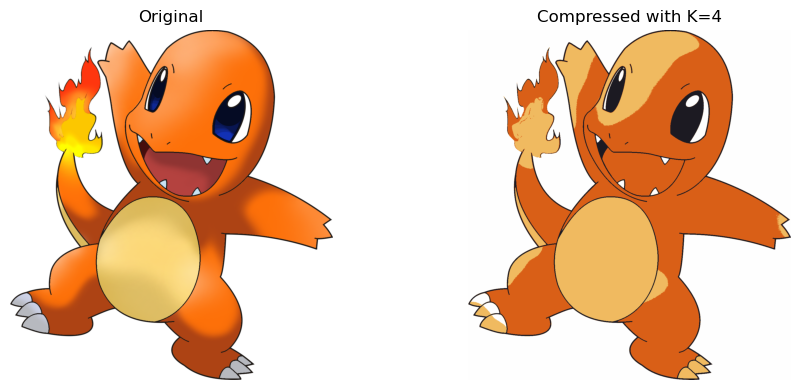

./output-images/compressed-charmainder k= 4.png SAVED successfully


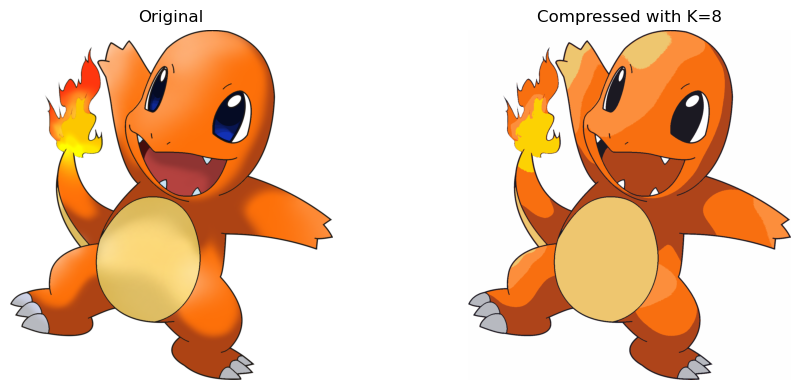

./output-images/compressed-charmainder k= 8.png SAVED successfully


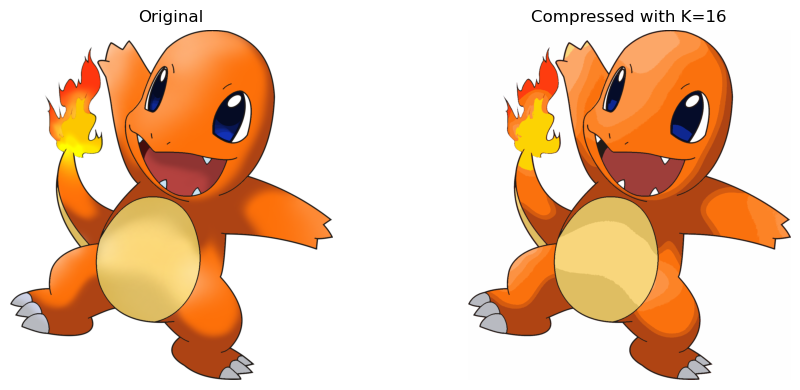

./output-images/compressed-charmainder k= 16.png SAVED successfully


In [8]:

# ---------- 3) Choose k and fit ----------
# k = 20  # try 4, 8, 16, ...
for k in [2, 4, 8, 16]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    
    # ---------- 4) Replace each pixel by its centroid ----------
    centers = kmeans.cluster_centers_          # shape (k, 3)
    labels = kmeans.labels_                    # length H*W
    compressed = centers[labels].reshape(H, W, 3)
    
    # ---------- 5) Show before/after ----------
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.imshow(np.clip(compressed, 0, 1))
    plt.title(f"Compressed with K={k}")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

    # ------------6) Save compressed image --------
    mpimg.imsave(f"./output-images/compressed-charmainder k= {k}.png", np.clip(compressed, 0, 1))
    print(f"./output-images/compressed-charmainder k= {k}.png SAVED successfully")


